In [1]:
# TODO: short markdown readme on what this notebook does

In [132]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

DEFAULT_METRICS = ['time', 'adjusted_rand_score', 'adjusted_mutual_info_score']

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [135]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}'
results_dump = f'{full_path}/results_dump.json'

print(f'Reading from results dump: \033[1m{results_dump}')

Reading from results dump: results/res_2024_03_08_T18_27_39/results_dump.json


In [107]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

# extract the dataframe, reorder columns, display sample
results_df = json_to_df(results_dump)
results_df = results_df[[
  'log_time', 'experiment', 'variant', 'n_points', 'noise',
  'time', 'timed_out',
  'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'normalized_mutual_info_score', 'v_measure_score',
]]
results_df

,log_time,experiment,variant,n_points,noise,time,timed_out,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,homogeneity_score,normalized_mutual_info_score,v_measure_score
0,2024-03-11 10:45:34.057690,DEFAULT,DEFAULT,100,0.00,0.010349,False,0.759256,0.808081,0.763795,0.758277,0.761026,0.761026
1,2024-03-11 10:45:34.072964,DEFAULT,DEFAULT,100,0.00,0.008266,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2024-03-11 10:45:34.087572,DEFAULT,DEFAULT,100,0.00,0.008154,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2024-03-11 10:45:34.108407,DEFAULT,DEFAULT,100,0.00,0.013555,False,0.394300,0.484848,0.400204,0.397313,0.398753,0.398753
4,2024-03-11 10:45:34.137171,DEFAULT,DEFAULT,100,0.00,0.012130,False,0.433763,0.485050,0.445979,0.430280,0.437989,0.437989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,2024-03-11 13:01:51.780200,Affinity,euclidean,2800,0.15,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
4497,2024-03-11 13:03:51.528588,Affinity,euclidean,2800,0.20,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
4547,2024-03-11 13:05:37.382572,Affinity,manhattan,2800,0.00,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
5349,2024-03-11 13:34:33.215027,Standardisation,none,2800,0.05,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# extract all the experiments and variants present in the dump
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
print('The following experiments and variants were found in results dump:')
padding = max([len(x) for x in experiment_variants.index])

for (experiment, variants) in experiment_variants.items():
    print(f'\033[1m{experiment:<{padding}}\033[0m: {", ".join(variants)}')

The following experiments and variants were found in results dump:
Affinity       : manhattan, euclidean
DEFAULT        : DEFAULT
Decomposition  : dense_eigh, sparse, sparse_eigh, dense
Laplacian      : standard, normalised
Refinement     : eps, knn
Standardisation: none, standard, min-max


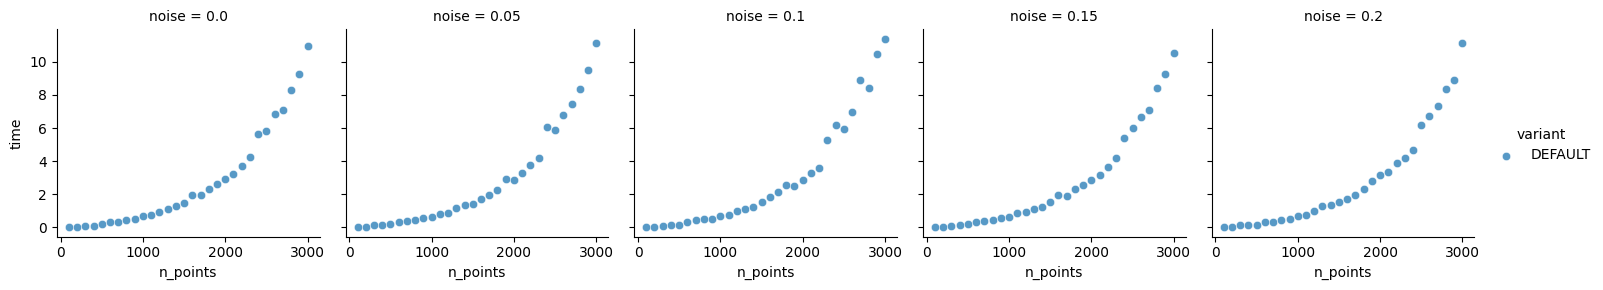

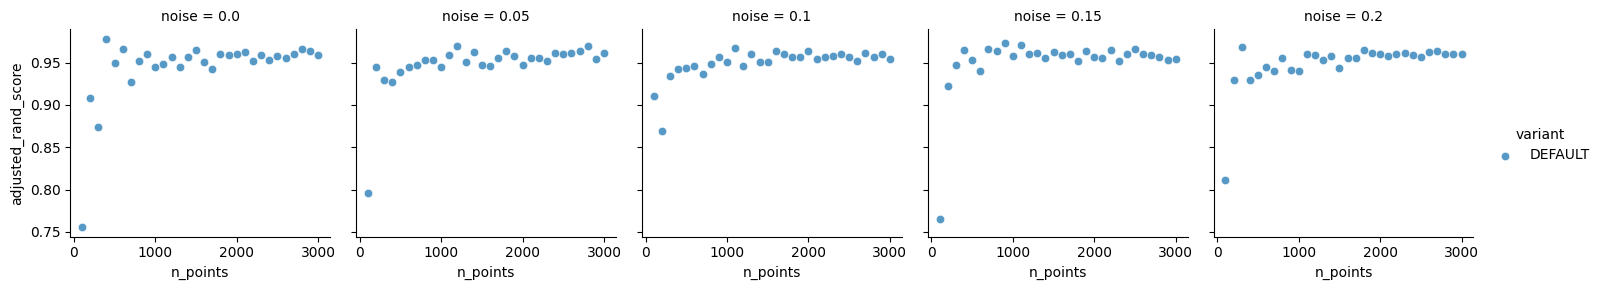

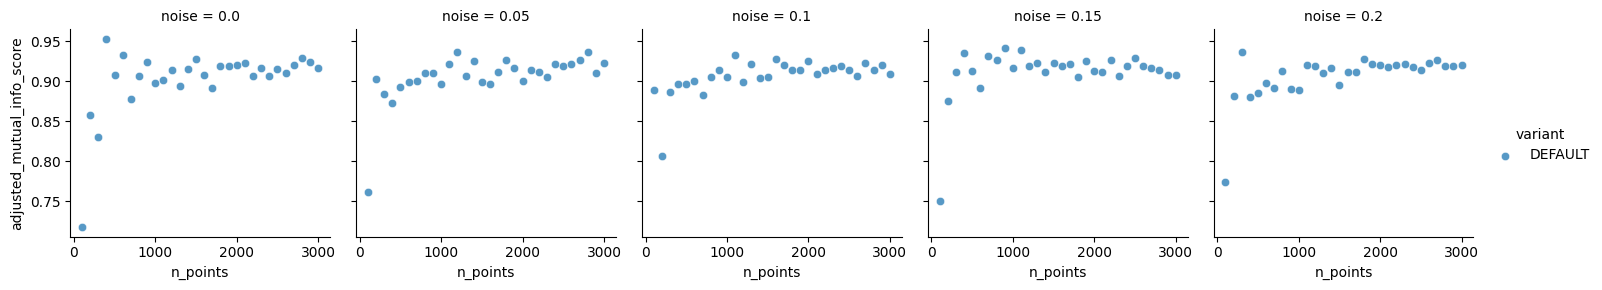

In [110]:
def show_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise", hue='variant')
        g.map_dataframe(sns.scatterplot, "n_points", metric, alpha = 0.75)
        g.add_legend()
        plt.show()

show_experiment_results('DEFAULT')

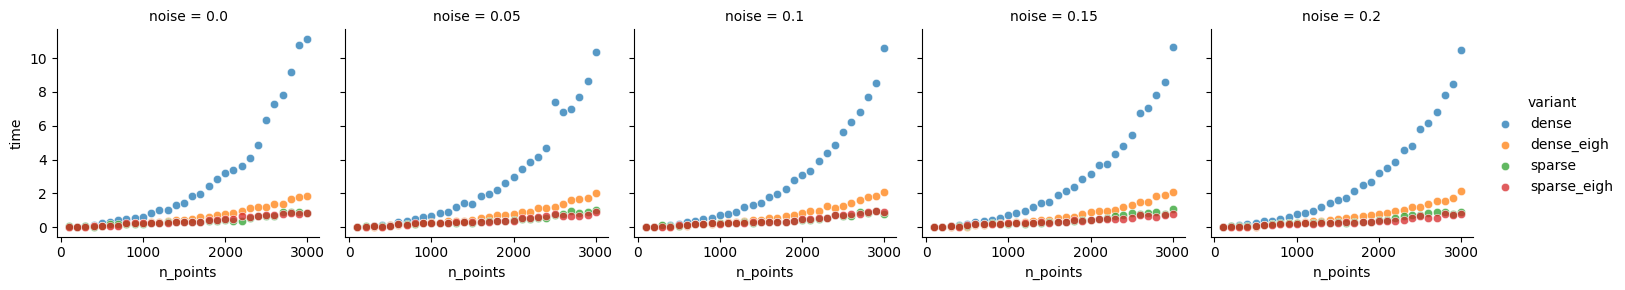

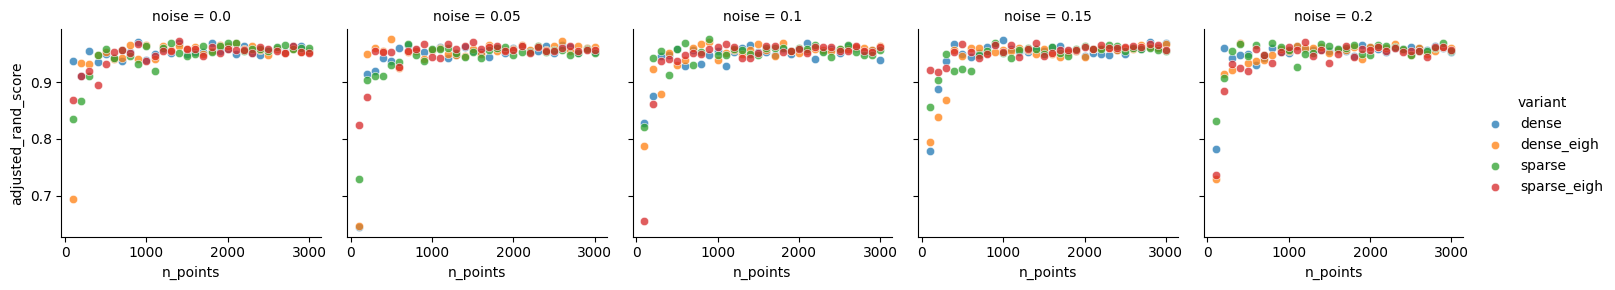

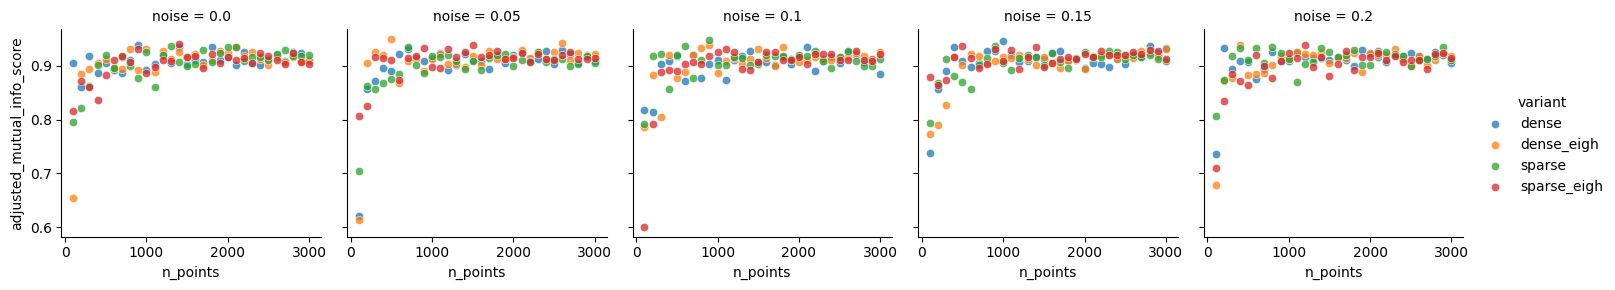

In [111]:
show_experiment_results('Decomposition')

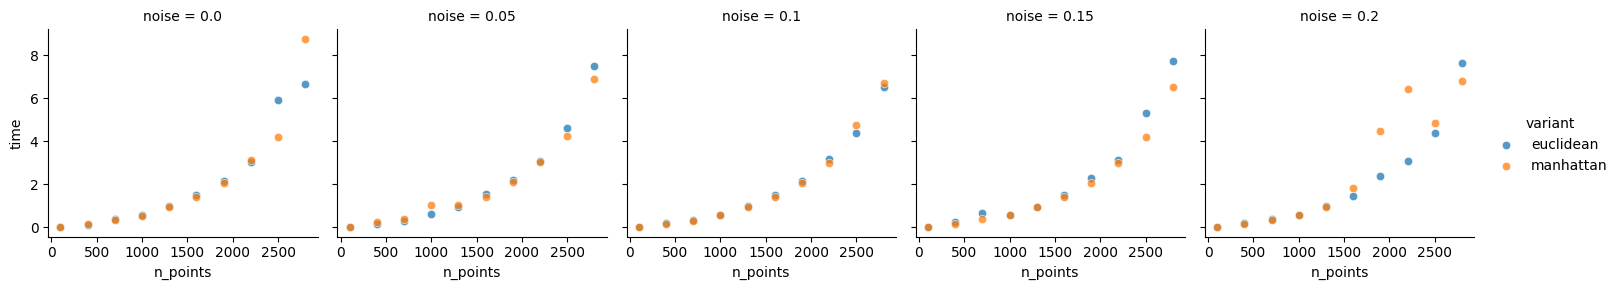

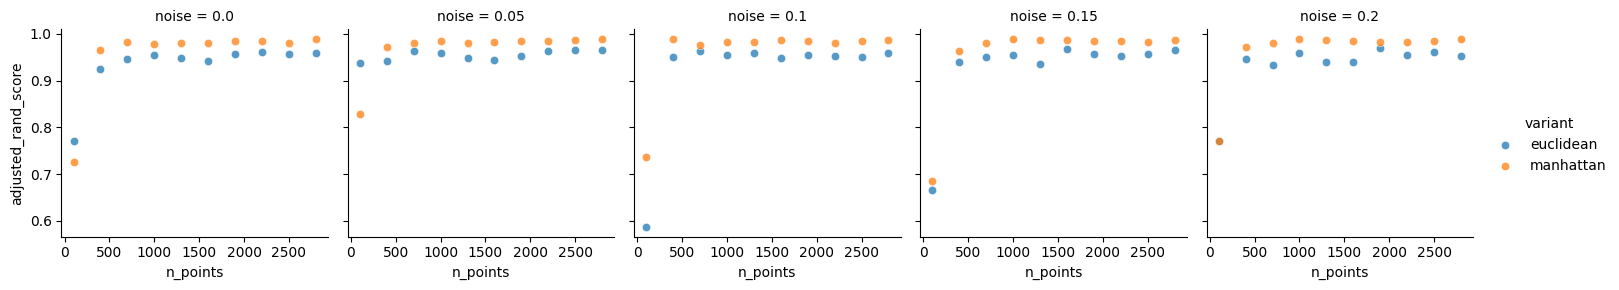

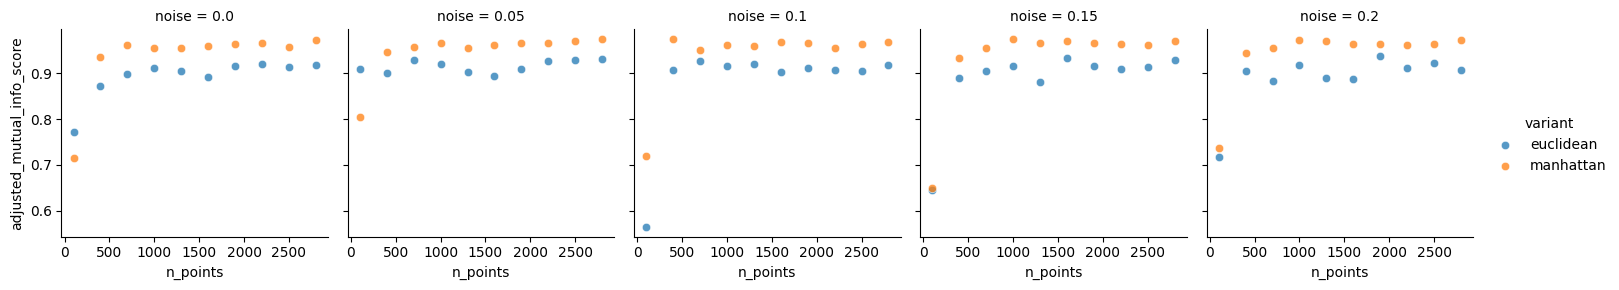

In [112]:
show_experiment_results('Affinity')

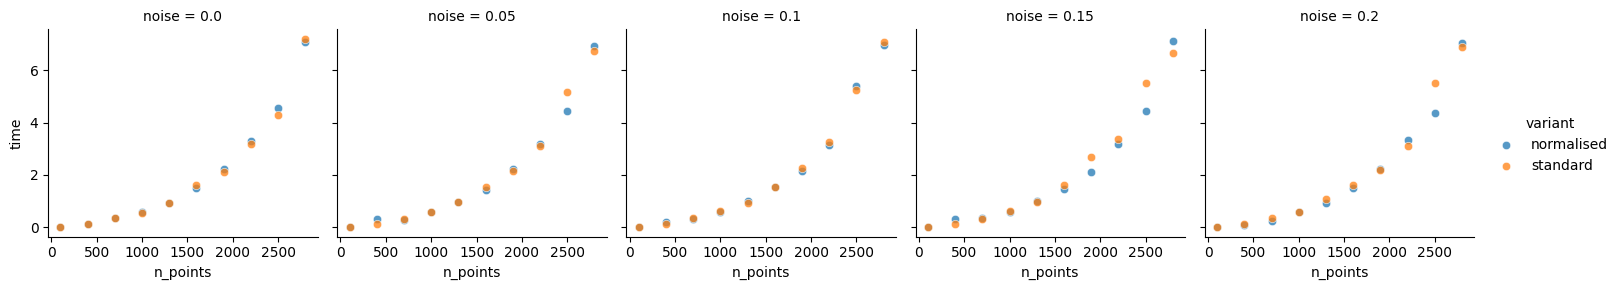

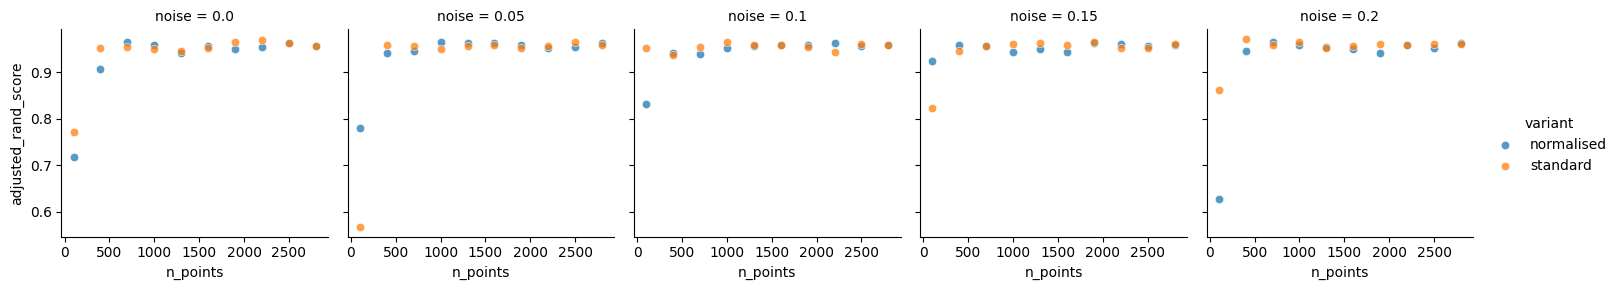

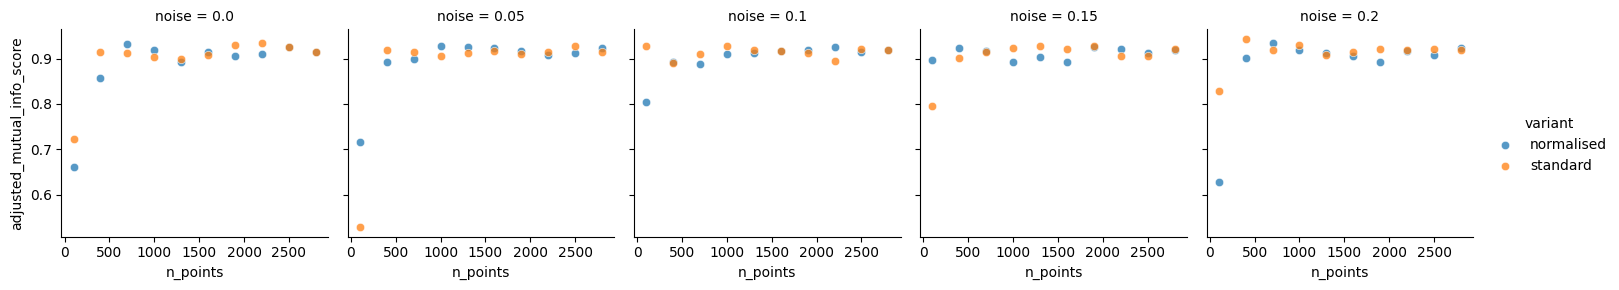

In [113]:
show_experiment_results('Laplacian')

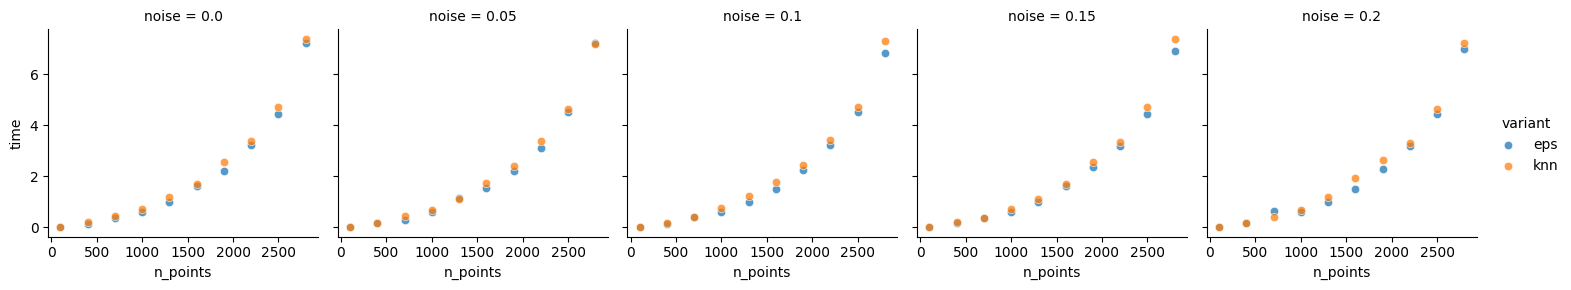

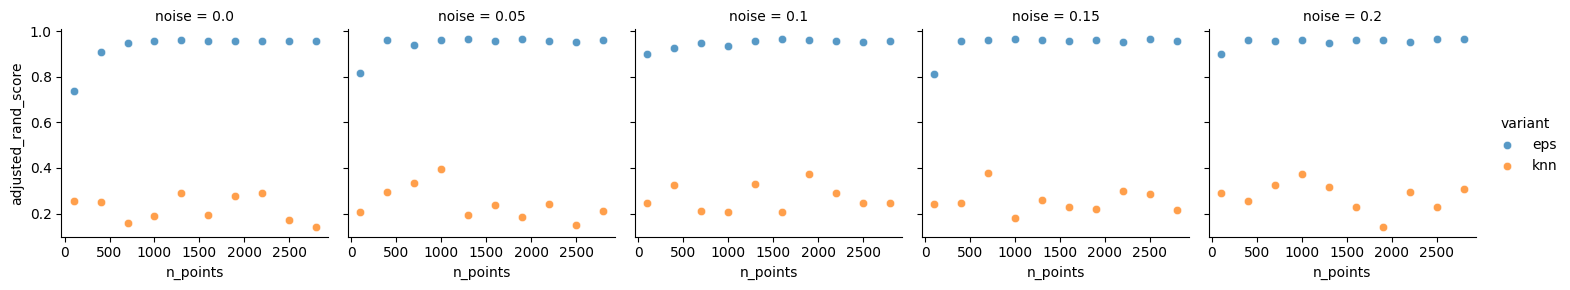

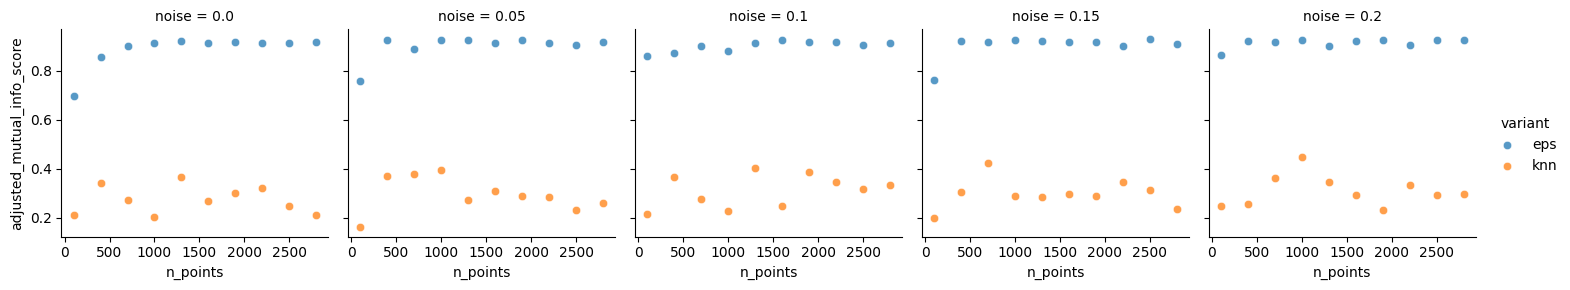

In [114]:
show_experiment_results('Refinement')

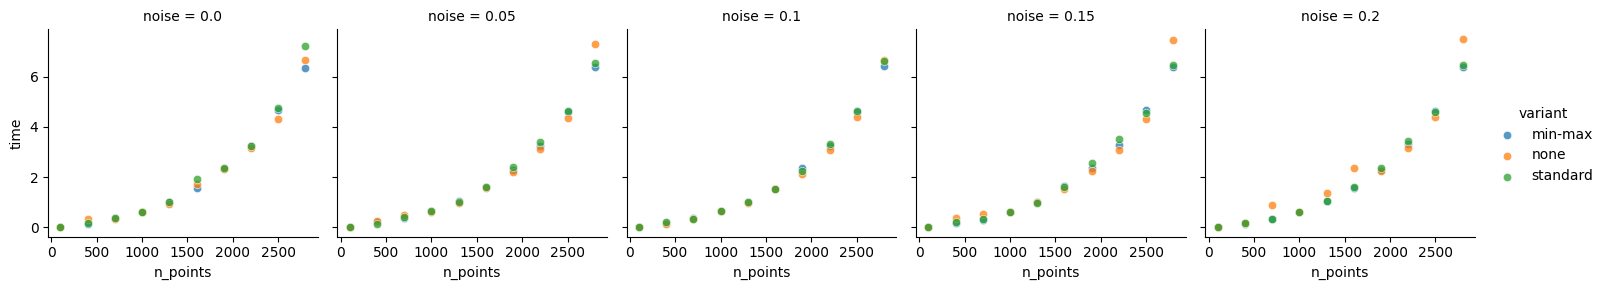

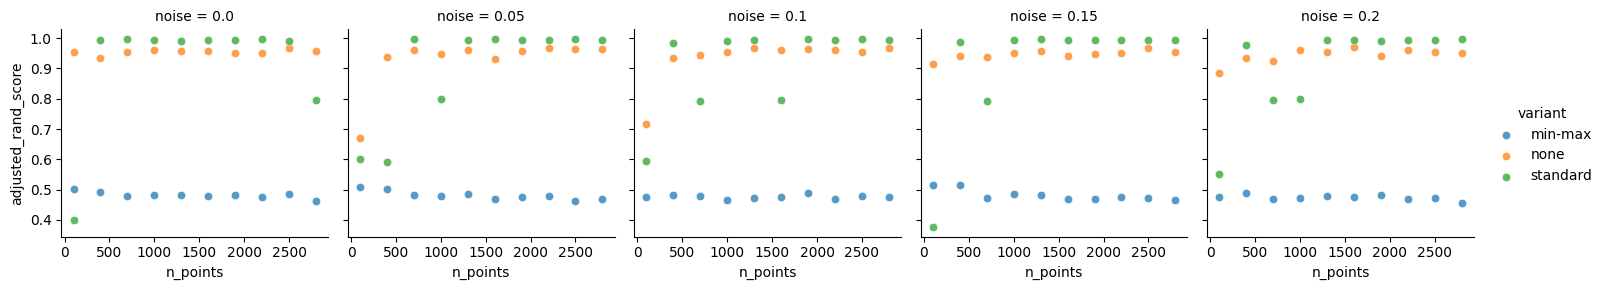

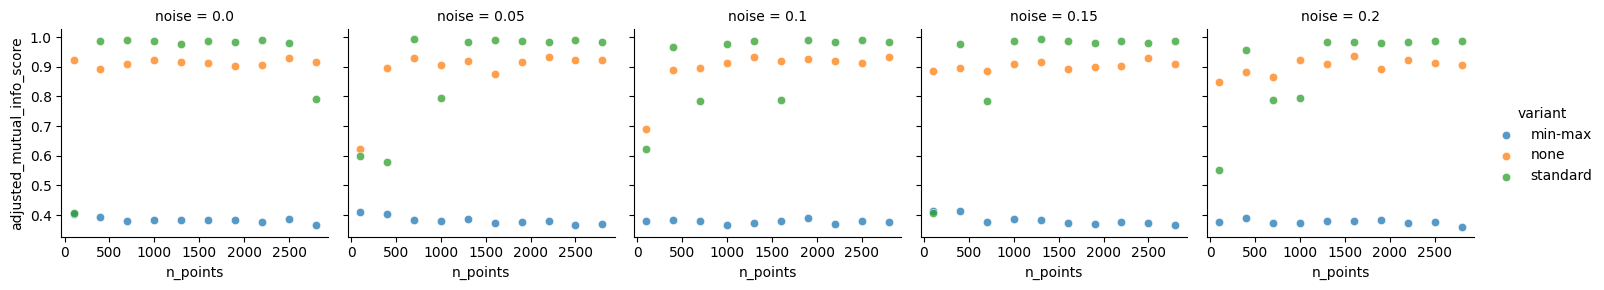

In [115]:
show_experiment_results('Standardisation')